# LINEAR REGRESSION
In this notebook, we will implement linear regression and apply it to our dataset. We will use the dataset we previously built and preprocessed.
We will use the `scikit-learn` and manual implementation library to implement linear regression.

In [93]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt
import seaborn as sns

from helpers import plot_variable_importance, write_metrics_in_csv, plot_ypred_vs_yreal

In [94]:
# Open dataset
filename: str = 'dataRead_processed.pkl.bz2'
dataset = pd.read_pickle(filename, compression='bz2')

In [95]:
# Drop columns that are not needed
dataset = dataset.drop(columns=[
    'city_attraction_area',
    'non_scholarized_15_years_old_or_more_2020',
    ])

# Split the dataset into features and target variable
X = dataset.drop('total_passengers_2022', axis=1)
y = dataset['total_passengers_2022']

# Last preprocessing steps
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object', 'category']).columns


# Prepare the final preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

## Scikit learn regression model

,Model,Hyperparameters,Mean Squared Error,Mean Absolute Error,Median Absolute Error,R2 Score
0,linear_regression,{'tuning': None},4.232696e+10,54041.449279,20135.87193,0.968842


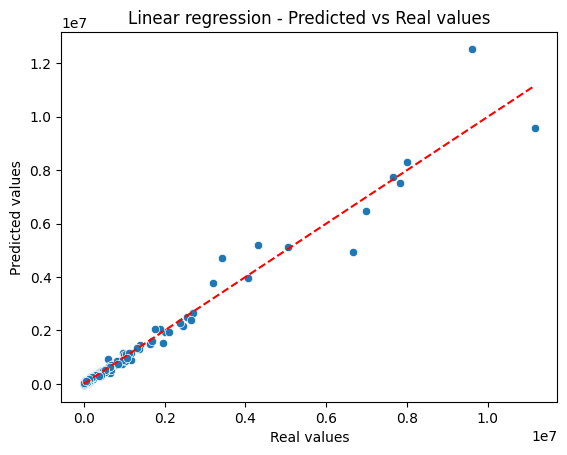

In [96]:

# Create the final pipeline
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Separate the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
linear_model.fit(X_train, y_train)

# Predict the target variable
y_pred_linear = linear_model.predict(X_test)

# Write metrics in a csv file
mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

plot_ypred_vs_yreal(y_pred_linear, y_test, 'Linear regression', False, True)

write_metrics_in_csv(y_pred_linear,
                     y_test,
                     'linear_regression',
                     {'tuning': None}
                     )

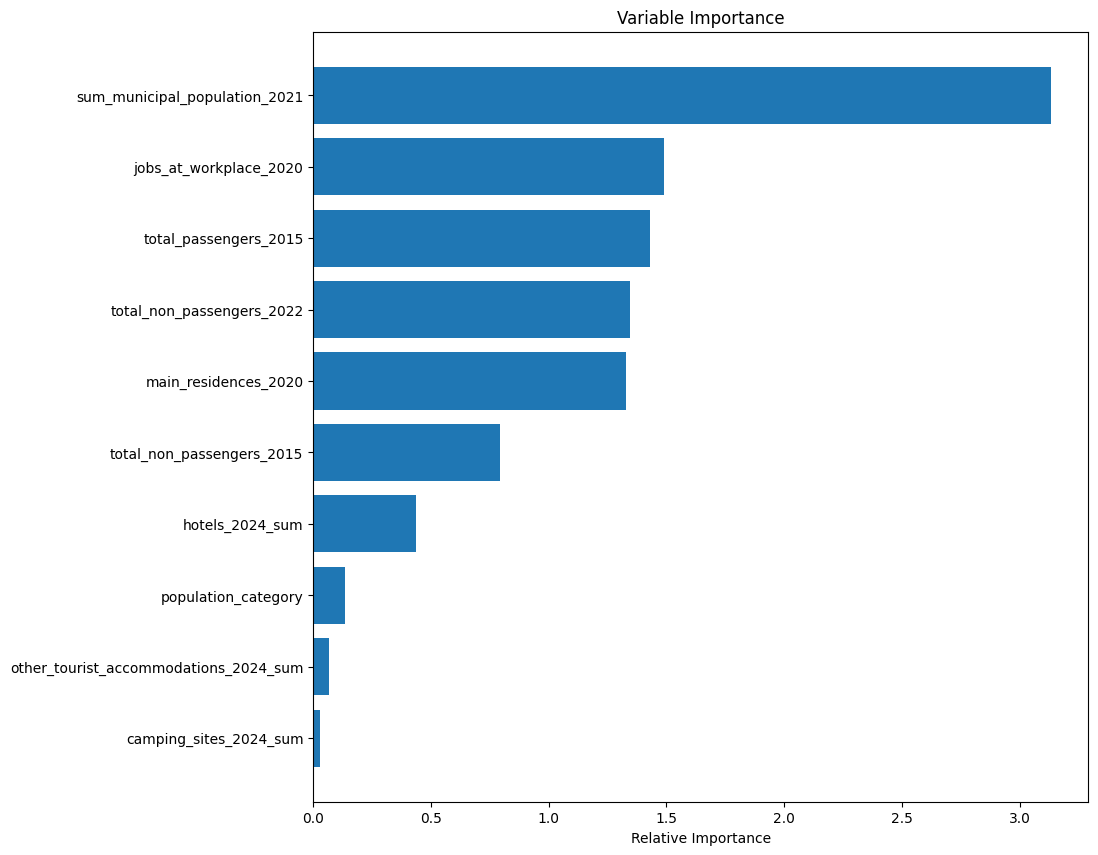

In [97]:
plot_variable_importance(linear_model, X_train, y_train, 10)

/Users/pierrejezegou/Documents/FIB/fib-ml-project/helpers.py:90: RuntimeWarning: invalid value encountered in log
  y_pred = np.log(y_pred)


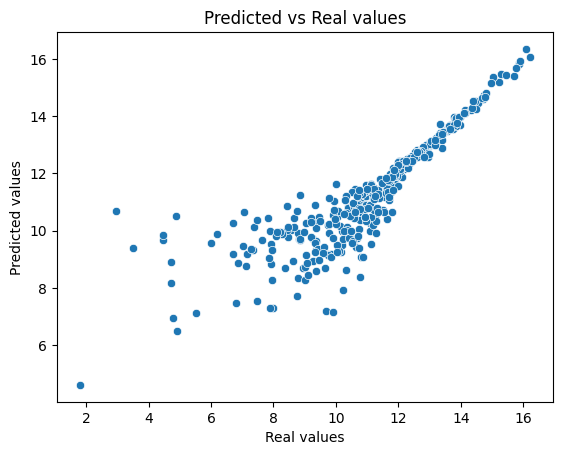

In [98]:
plot_ypred_vs_yreal(y_pred_linear, y_test, False, True)

## Ridge regularization
To avoid unwanted too complex model and overfitting, we will use Ridge regularization. Ridge regression adds a penalty term to the cost function. The penalty term is the sum of the squares of the coefficients multiplied by the regularization parameter alpha. The regularization parameter alpha is a hyperparameter that controls the strength of the penalty term. The larger the alpha, the stronger the regularization.

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

param_grid = {
    'regressor__alpha': [10**i for i in range(-3, 3)],
    'regressor__fit_intercept': [True, False],
    'regressor__tol': [1e-4, 1e-3, 1e-2],
    'regressor__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga']
}

# Créer le pipeline complet avec le préprocesseur et le modèle
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres trouvés
print(grid_search.best_params_)

/Users/pierrejezegou/Documents/FIB/fib-ml-project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pierrejezegou/Documents/FIB/fib-ml-project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pierrejezegou/Documents/FIB/fib-ml-project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pierrejezegou/Documents/FIB/fib-ml-project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pierrejezegou/Documents/FIB/fib-ml-project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: C

{'regressor__alpha': 1, 'regressor__fit_intercept': True, 'regressor__solver': 'saga', 'regressor__tol': 0.001}


In [100]:
# Train the model with the best hyperparameters
ridge_model = grid_search.best_estimator_

# Predict the target variable
y_pred_ridge = ridge_model.predict(X_test)

# Write metrics in a csv file
write_metrics_in_csv(y_pred_ridge, y_test, 'ridge_regression', grid_search.best_params_)


,Model,Hyperparameters,Mean Squared Error,Mean Absolute Error,Median Absolute Error,R2 Score
0,ridge_regression,"{'regressor__alpha': 1, 'regressor__fit_interc...",4.366404e+10,52531.786574,15043.433436,0.967857


/Users/pierrejezegou/Documents/FIB/fib-ml-project/helpers.py:90: RuntimeWarning: invalid value encountered in log
  y_pred = np.log(y_pred)


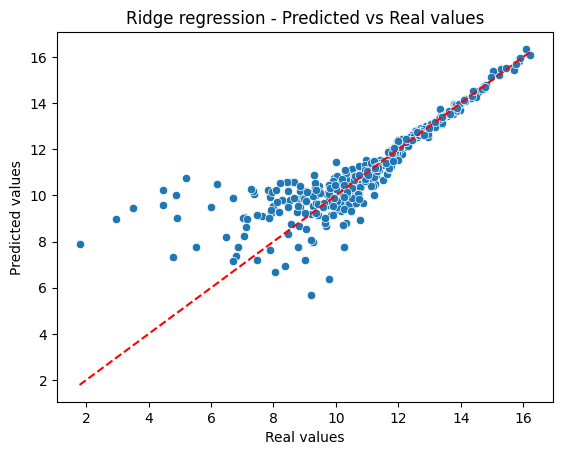

In [101]:
plot_ypred_vs_yreal(y_pred_ridge, y_test, 'Ridge regression', True, True)

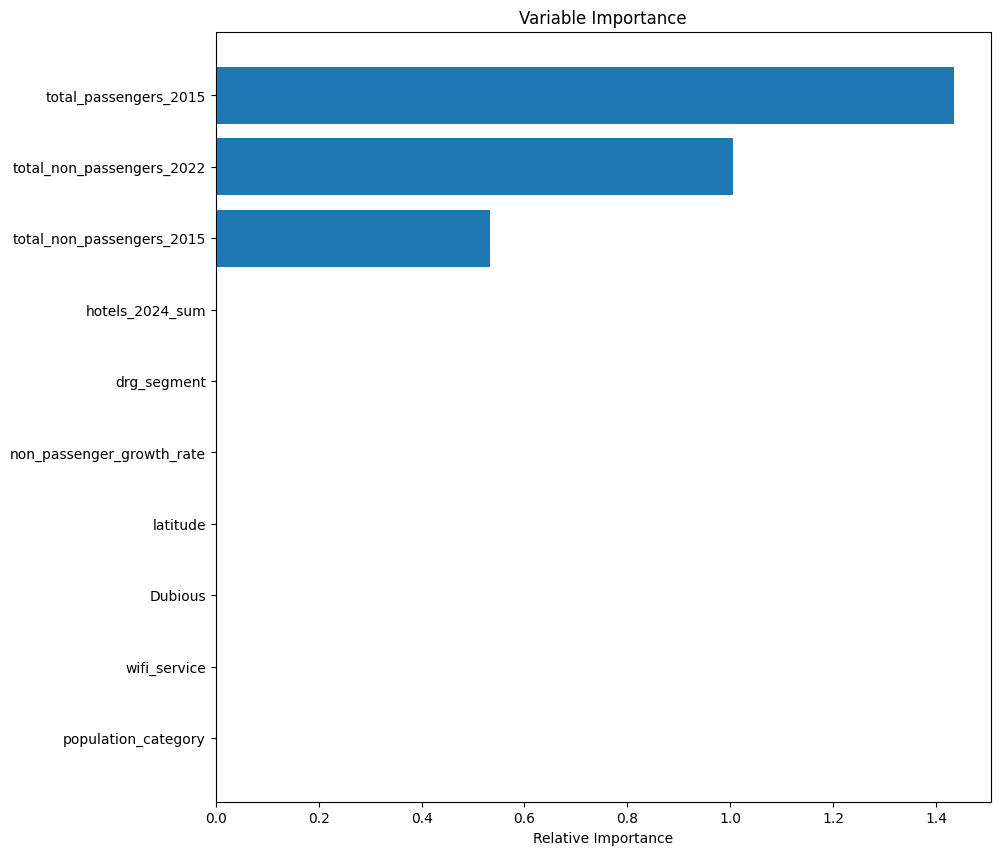

In [102]:
plot_variable_importance(ridge_model, X_train, y_train, 10)

## Lasso regularization

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

param_grid = {
    'regressor__alpha': [10**i for i in range(-3, 3)],  # Réglage de l'alpha pour Lasso
    'regressor__fit_intercept': [True, False],          # Option pour inclure ou non l'intercept
    'regressor__tol': [1e-4, 1e-3, 1e-2],               # Tolérance pour l'optimisation
    'regressor__selection': ['cyclic', 'random']        # Stratégie de sélection pour l'optimisation
}

# Créer le pipeline complet avec le préprocesseur et le modèle Lasso
lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

# Utiliser GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres trouvés
print(grid_search.best_params_)

In [ ]:
# Train the model with the best hyperparameters
lasso_model = grid_search.best_estimator_

# Predict the target variable
y_pred_lasso = ridge_model.predict(X_test)

# Write metrics in a csv file
write_metrics_in_csv(y_pred_ridge, y_test, 'ridge_regression', grid_search.best_params_)


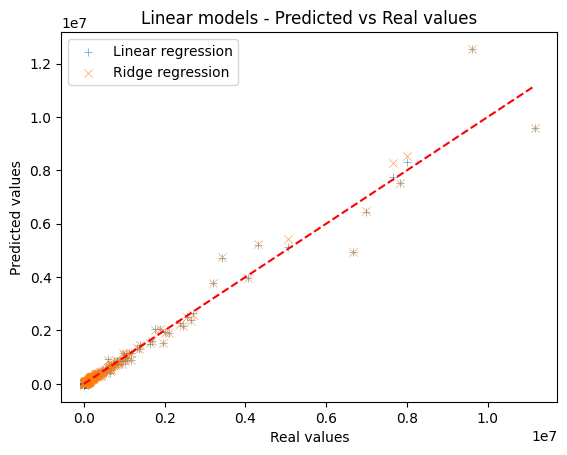

In [109]:
# Add labels
plt.xlabel('Real values')
plt.ylabel('Predicted values')

plt.title(f'Linear models - Predicted vs Real values')

# Plot
sns.scatterplot(x=y_test, y=y_pred_linear, alpha=0.75, marker='+', label='Linear regression')
sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.75, marker='x', label='Ridge regression')

# # x, yin log scale
# plt.xscale('log')
# plt.yscale('log')

plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], '--', color='red')